# SyNET Data Generator using NViSII

Install dependencies

In [1]:
%pip install nvisii


     ---------------------------------------- 4.0/4.0 MB 13.4 MB/s eta 0:00:00


Simple render test (example taken from NViSII repo)

In [2]:
import nvisii

opt = lambda: None
opt.spp = 50 
opt.width = 512
opt.height = 512 
opt.out = 'simple_scene.png'

# headless - no window
# verbose - output number of frames rendered, etc..
nvisii.initialize(headless = True, verbose = True)

# Use a neural network to denoise ray traced
nvisii.enable_denoiser()

# First, lets create an entity that will serve as our camera.
camera = nvisii.entity.create(name = "camera")

# To place the camera into our scene, we'll add a "transform" component.
# (All nvisii objects have a "name" that can be used for easy lookup later.)
camera.set_transform(nvisii.transform.create(name = "camera_transform"))

# To make our camera entity act like a "camera", we'll add a camera component
camera.set_camera(
    nvisii.camera.create_from_fov(
        name = "camera_camera", 
        field_of_view = 0.785398, # note, this is in radians
        aspect = opt.width / float(opt.height)
    )
)

# Finally, we'll select this entity to be the current camera entity.
# (nvisii can only use one camera at the time)
nvisii.set_camera_entity(camera)

# Lets set the camera to look at an object. 
# We'll do this by editing the transform component.
camera.get_transform().look_at(at = (0, 0, .9), up = (0, 0, 1), eye = (0, 5, 1))

# Next, lets at an object (a floor).
floor = nvisii.entity.create(
    name = "floor",
    mesh = nvisii.mesh.create_plane("mesh_floor"),
    transform = nvisii.transform.create("transform_floor"),
    material = nvisii.material.create("material_floor")
)

# Lets make our floor act as a mirror
mat = floor.get_material()
# mat = nvisii.material.get("material_floor") # <- this also works

# Mirrors are smooth and "metallic".
mat.set_base_color((0.19,0.16,0.19)) 
mat.set_metallic(1) 
mat.set_roughness(0)

# Make the floor large by scaling it
trans = floor.get_transform()
trans.set_scale((5,5,1))

# Let's also add a sphere
sphere = nvisii.entity.create(
    name="sphere",
    mesh = nvisii.mesh.create_sphere("sphere"),
    transform = nvisii.transform.create("sphere"),
    material = nvisii.material.create("sphere")
)
sphere.get_transform().set_position((0,0,0.41))
sphere.get_transform().set_scale((0.4, 0.4, 0.4))
sphere.get_material().set_base_color((0.1,0.9,0.08))  
sphere.get_material().set_roughness(0.7)   

# Now that we have a simple scene, let's render it 
print("rendering to", "simple_scene.png")
nvisii.render_to_file(
    width = opt.width, 
    height = opt.height, 
    samples_per_pixel = opt.spp,   
    file_path = "simple_scene.png"
)

nvisii.deinitialize()

rendering to simple_scene.png


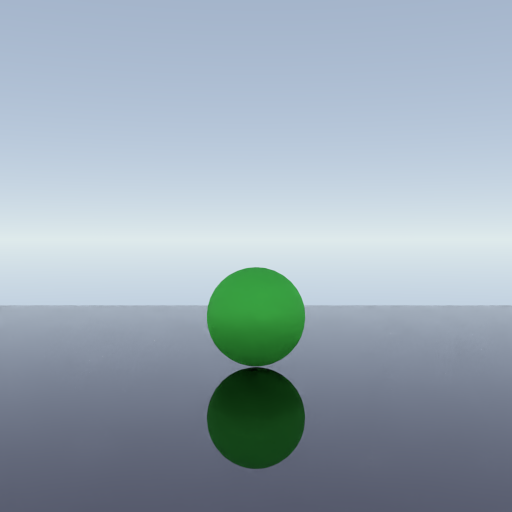

In [3]:
from IPython.display import Image
Image(filename='simple_scene.png')